In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
auto_df = pd.read_csv('automobile.txt', sep= ",")
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Data Type query
print(auto_df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


<AxesSubplot: >

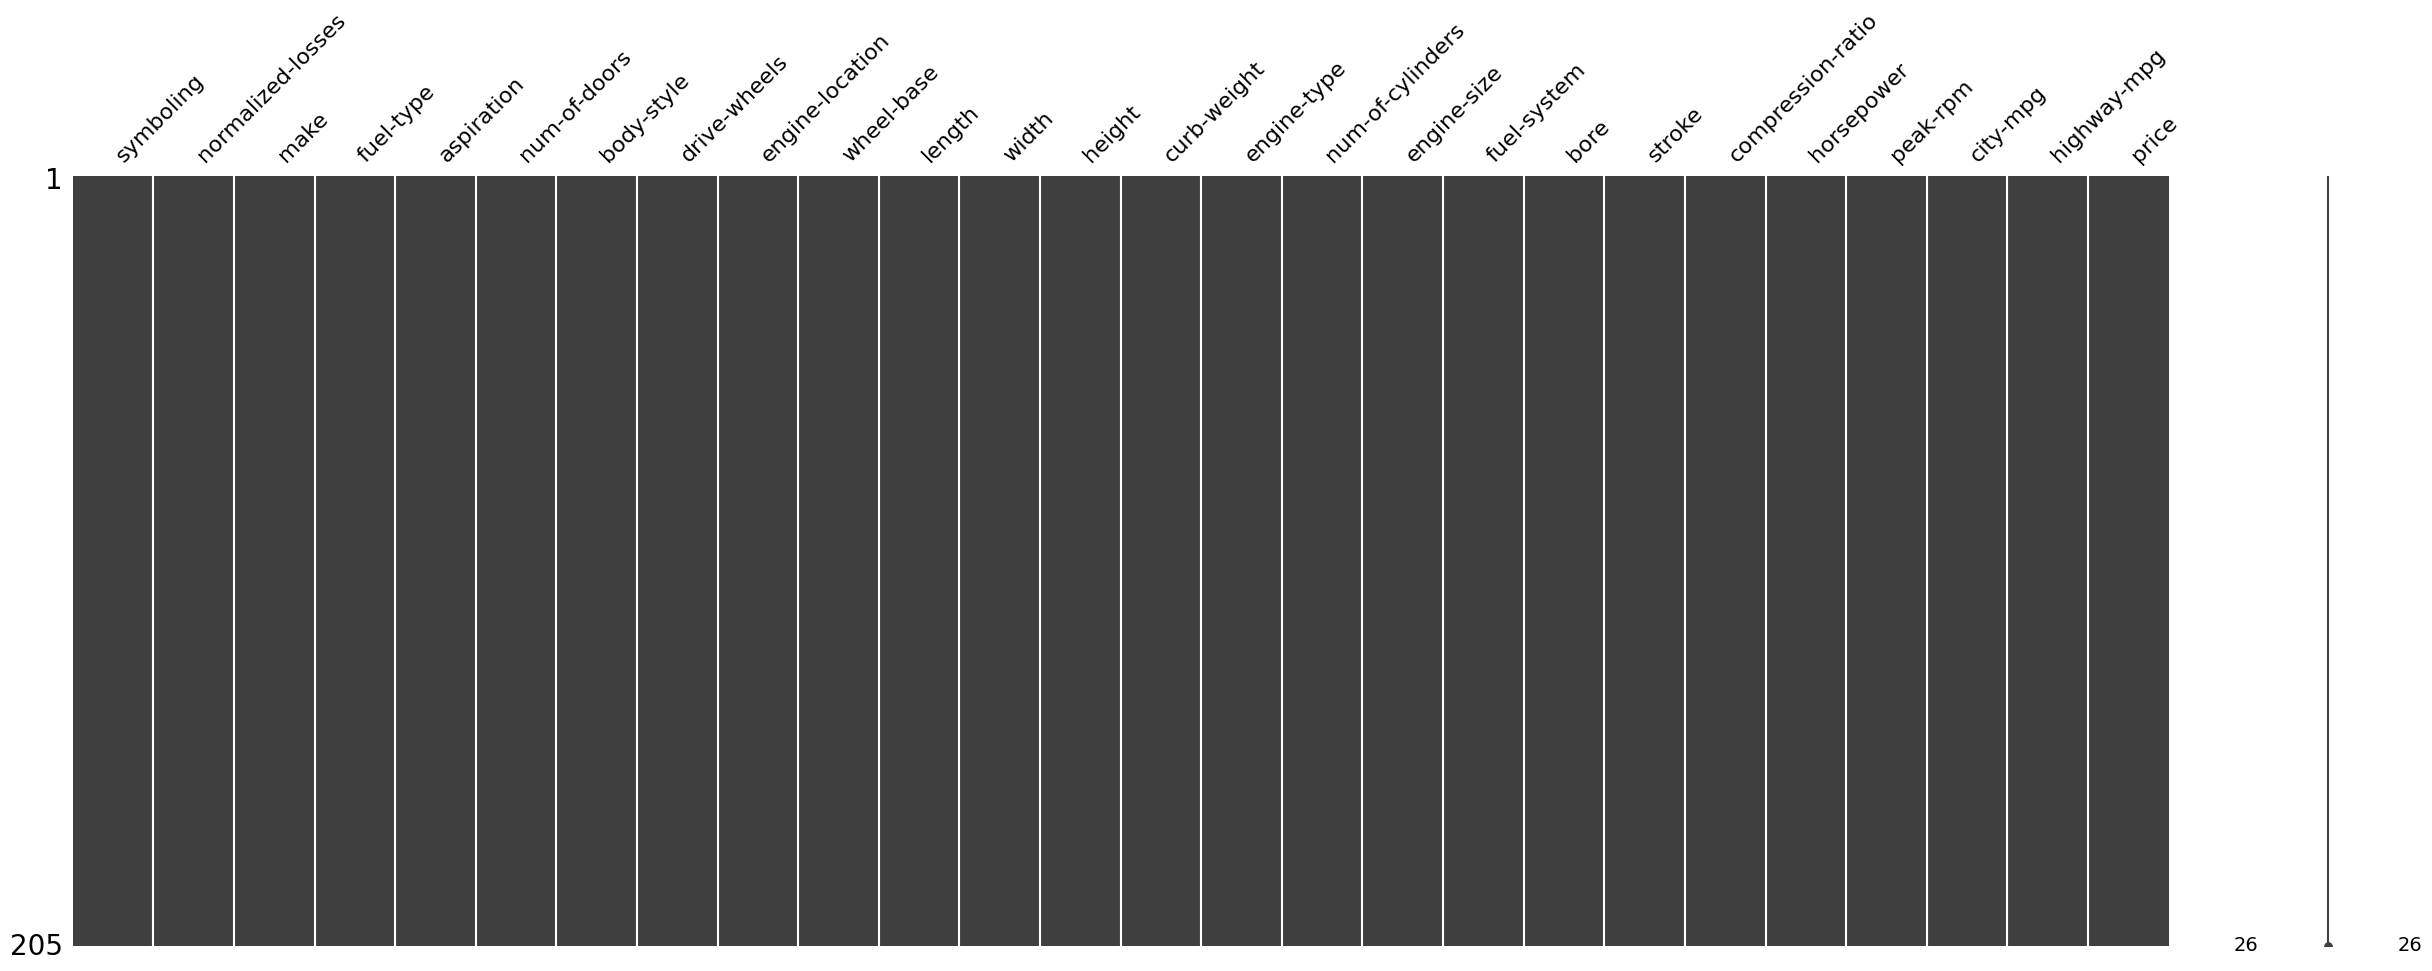

In [4]:
# Display any missing data
missingno.matrix(auto_df, figsize = (30,10))

In [5]:
# Clean Data - remove columns
auto_df.drop("aspiration", inplace=True, axis=1)
auto_df.drop("symboling", inplace=True, axis=1)

In [6]:
# Remove duplicate entries
auto_df.drop_duplicates()

,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,?,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,?,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,164,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,164,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,95,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,95,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,95,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
# Remove ? from table
auto_df = auto_df.loc[auto_df["normalized-losses"] != "?"]
auto_df = auto_df.loc[auto_df["bore"] != "?"]
auto_df = auto_df.loc[auto_df["stroke"] != "?"]

In [8]:
# Change horsepower to numberic
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"])

In [9]:
# Confirm conversion
print(auto_df.dtypes)

normalized-losses     object
make                  object
fuel-type             object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [10]:
# Top 5 highest engine size
engine = auto_df.sort_values(["engine-size"])

print("Top 5 and lowest 5 engine sizes.")
engine.iloc[:]

Top 5 and lowest 5 engine sizes.


,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,121,chevrolet,gas,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
32,101,honda,gas,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
22,118,dodge,gas,two,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377
121,154,plymouth,gas,four,sedan,fwd,front,93.7,167.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,148,dodge,gas,four,sedan,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,93,mercedes-benz,diesel,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
67,93,mercedes-benz,diesel,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
70,93,mercedes-benz,diesel,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
72,142,mercedes-benz,gas,two,convertible,rwd,front,96.6,180.3,70.5,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056


In [11]:
# Top 5 most expensive
expense = auto_df.sort_values("price")

print("Top 5 and lowest 5 car prices.")
expense.iloc[:]

Top 5 and lowest 5 car prices.


,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
147,89,subaru,gas,four,wagon,fwd,front,97.0,173.5,65.4,...,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198
62,115,mazda,gas,four,sedan,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
40,85,honda,gas,four,sedan,fwd,front,96.5,175.4,62.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
42,107,honda,gas,two,sedan,fwd,front,96.5,169.1,66.0,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
61,129,mazda,gas,two,hatchback,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,102,subaru,gas,four,sedan,fwd,front,97.2,172.0,65.4,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960
190,256,volkswagen,gas,two,hatchback,fwd,front,94.5,165.7,64.0,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
175,65,toyota,gas,four,hatchback,fwd,front,102.4,175.6,66.5,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
169,134,toyota,gas,two,hatchback,rwd,front,98.4,176.2,65.6,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989


'The higher the price, the higher the engine-size'

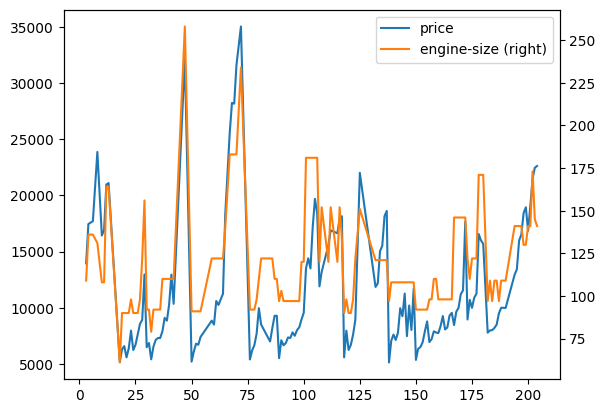

In [12]:
# Is more expense mean higher engine size? - Visualise by line
# Obtain data required
price = pd.to_numeric(auto_df['price'])
engine_size = auto_df["engine-size"]

# Plot data by line
price.plot.line(legend = True)
engine_size.plot.line(legend = True, secondary_y = True)

'''The higher the price, the higher the engine-size'''

'The higher the engine-size, the higher the horsepower of the car'

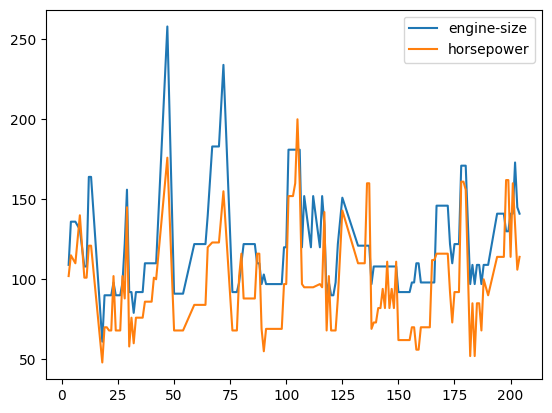

In [13]:
# Is higher engine size mean more horsepower - visualise by line
# Obtain data required
engine_size = auto_df["engine-size"]
horsepower = auto_df["horsepower"]

# Plot data by line
engine_size.plot.line(legend = True)
horsepower.plot.line(legend = True)

'''The higher the engine-size, the higher the horsepower of the car'''

' The most common car make is toyota, followed by Nissan'

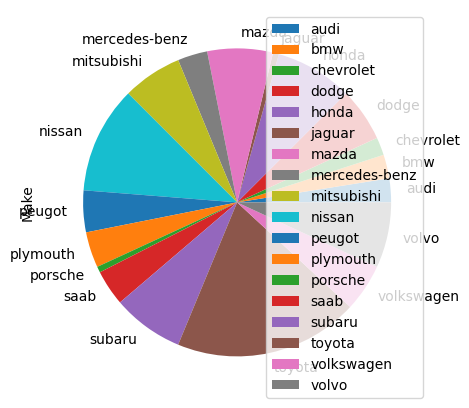

In [14]:
# Most common car make - visualise by pie plot
# Obtain data
group_make = auto_df.groupby(by=["make"])

# Count data
make_count = group_make.count()

# Obtain data required
make_count = pd.DataFrame(make_count.iloc[:,0])

# Plot data by pie
make_count.plot.pie(subplots = True, figsize=(5,5), ylabel = "Make")
''' The most common car make is toyota, followed by Nissan'''

'The mid-range engine sizes have the better mpg in city / highway.'

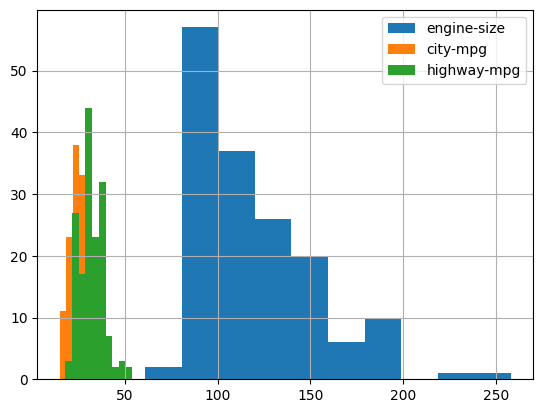

In [15]:
# engine size vs mpg city - visualise by histogram
# Obtain data
engine_size = auto_df["engine-size"]
mpg_city = auto_df["city-mpg"]
mpg_highway = auto_df["highway-mpg"]

# Plot data
engine_size.hist(legend = True)
mpg_city.hist(legend = True)
mpg_highway.hist(legend = True)

'''The mid-range engine sizes have the better mpg in city / highway.'''

gas       145
diesel     15
Name: fuel-type, dtype: int64


'The most common fuel type is Gas.'

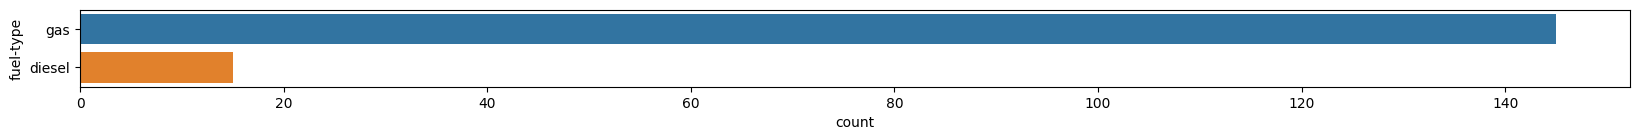

In [16]:
# Fuel Type - Visualise

# Obtain data
fuel = auto_df["fuel-type"]

# Plot data
fig = plt.figure(figsize = (20,1))
sns.countplot(y="fuel-type", data = auto_df)
print(fuel.value_counts())

'''The most common fuel type is Gas.'''